In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [14]:
# Load preprocessed data from previous notebook using pickle
with open('Pickle Files/step3.pkl', 'rb') as f:
    data_bundle = pickle.load(f)

X = data_bundle['X']
preprocessor = data_bundle['preprocessor']
customer_features_final = data_bundle['customer_features_final']
df = data_bundle['df']

print("Preprocessed data loaded from step3.pkl:", X.shape)
print("Data with features loaded:", df.shape)

Preprocessed data loaded from step3.pkl: (8536, 654)
Data with features loaded: (8536, 10)


# K-Means Clustering for Customer Segmentation

Apply K-Means clustering to segment customers based on their behavioral patterns:

1. **Elbow Method** - Find optimal number of clusters
2. **K-Means Clustering** - Apply clustering algorithm 
3. **Silhouette Analysis** - Validate cluster quality
4. **Cluster Assignment** - Add cluster labels to customer data

This analysis will identify distinct customer segments for targeted marketing strategies.

In [15]:
# Import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

## Why K-Means Clustering for Customer Segmentation?

K-Means is the optimal choice for this e-commerce customer segmentation project for several key reasons:

###  **Perfect for Customer Segmentation**
- **Centroid-based clustering** creates distinct customer groups with clear centers
- **Distance-based algorithm** groups customers with similar behavioral patterns
- **Scalable** to handle large e-commerce datasets efficiently

###  **Ideal for Our Feature Set**
- **Numerical features** (spending, frequency, ratios) work perfectly with K-Means distance calculations
- **Standardized data** ensures all features contribute equally to clustering
- **Mixed behavioral patterns** (browsing, purchasing, session data) benefit from K-Means' ability to find natural groupings

###  **Business-Friendly Results**
- **Interpretable clusters** - easy to understand customer segments for marketing teams
- **Actionable insights** - clear customer profiles for targeted campaigns
- **Flexible K selection** - can adjust number of segments based on business needs

###  **Technical Advantages**
- **Fast convergence** on preprocessed data
- **Deterministic results** with fixed random_state for reproducible analysis
- **Well-established** algorithm with proven success in customer analytics

###  **Compared to Alternatives**
- **vs Hierarchical Clustering:** More scalable for large datasets
- **vs DBSCAN:** Better for spherical customer groups rather than density-based clusters  
- **vs Gaussian Mixture:** Simpler interpretation for business stakeholders

K-Means provides the perfect balance of **technical robustness** and **business interpretability** for customer segmentation.

## Understanding K-Means Clustering: Key Concepts

###  **How K-Means Works**

K-Means clustering groups data points into **k clusters** by finding cluster centers (centroids) that minimize the distance between points and their assigned cluster center.

**Algorithm Steps:**
1. **Initialize** k random centroids in the data space
2. **Assign** each data point to the nearest centroid
3. **Update** centroids to the mean position of assigned points
4. **Repeat** steps 2-3 until centroids stop moving significantly
5. **Result** k clusters with optimized centroids

###  **What is K?**

**K** is the **number of clusters** you want to create:
- **K=2**: Divides customers into 2 groups (e.g., Active vs Inactive)
- **K=4**: Creates 4 customer segments (e.g., High-value, Occasional, Browsers, Price-sensitive)
- **K=6**: More granular segmentation with 6 distinct customer types

**Choosing K is crucial** - too few clusters oversimplify, too many create noise.

###  **What is Inertia?**

**Inertia** measures **cluster compactness** - how tightly grouped points are within their clusters.

**Formula:** Sum of squared distances from each point to its cluster centroid
```
Inertia = Σ (distance from point to centroid)²
```

**Interpretation:**
- **Lower inertia** = More compact, well-defined clusters
- **Higher inertia** = Spread out, loosely defined clusters
- **Goal:** Minimize inertia while keeping reasonable number of clusters

###  **Elbow Method Explained**

The **Elbow Method** helps find the optimal number of clusters by plotting inertia vs k.

**How it works:**
1. **Calculate inertia** for different k values (k=2, 3, 4, etc.)
2. **Plot the curve** of inertia vs k
3. **Find the "elbow"** - the point where adding more clusters doesn't significantly reduce inertia

**Visual Pattern:**
```
Inertia
   |  \
   |   \
   |    \
   |     \____  ← "Elbow" at k=4
   |          \____
   +-------------------> K
   2  3  4  5  6  7  8
```

###  **Silhouette Score Explained**

**Silhouette Score** measures **cluster quality** by evaluating how well-separated clusters are.

**What it measures:**
- **a**: Average distance from a point to other points in the **same cluster**
- **b**: Average distance from a point to points in the **nearest different cluster**

**Formula:** `Silhouette = (b - a) / max(a, b)`

**Score Interpretation:**
- **+1**: Perfect clustering (points very close to their cluster, far from others)
- **0**: Overlapping clusters (points on cluster boundaries)  
- **-1**: Wrong clustering (points closer to different cluster)

**Quality Scale:**
- **0.7-1.0**: Excellent separation
- **0.5-0.7**: Good clustering
- **0.25-0.5**: Fair/acceptable
- **<0.25**: Poor clustering

**For customer segmentation, 0.3-0.5 is often acceptable** because customer behavior naturally overlaps.

Testing different numbers of clusters...
K=2: Inertia=17745.10
K=3: Inertia=15625.96
K=4: Inertia=14260.66
K=5: Inertia=13230.88
K=4: Inertia=14260.66
K=5: Inertia=13230.88
K=6: Inertia=12684.03
K=7: Inertia=12158.58
K=6: Inertia=12684.03
K=7: Inertia=12158.58
K=8: Inertia=11953.04
K=9: Inertia=11442.78
K=8: Inertia=11953.04
K=9: Inertia=11442.78
K=10: Inertia=11179.45
K=10: Inertia=11179.45


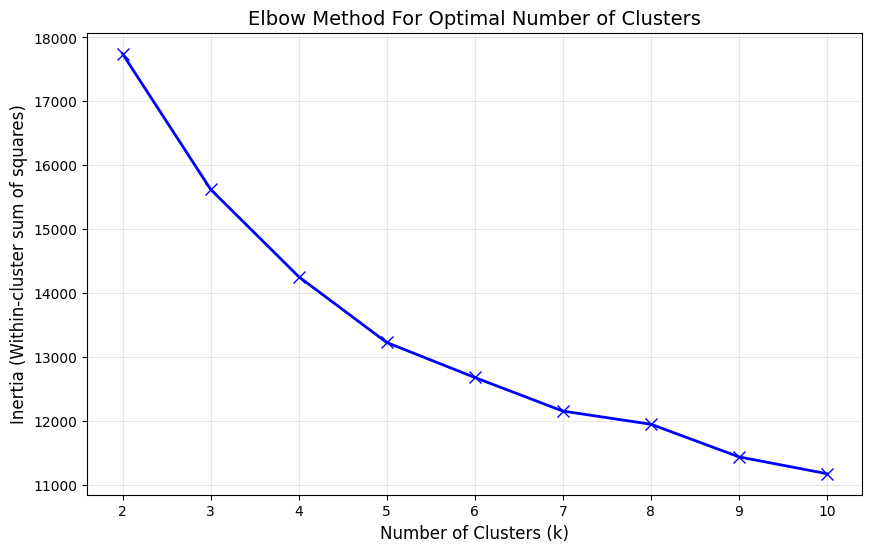


Inertia values: [17745.09636269193, 15625.955858358046, 14260.663226397692, 13230.878269743944, 12684.034641331571, 12158.581115507688, 11953.043896181278, 11442.784232685017, 11179.448957310493]


In [16]:
# Elbow Method to find optimal number of clusters
inertia = []
K_range = range(2, 11)

print("Testing different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bx-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method For Optimal Number of Clusters', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

print(f"\nInertia values: {inertia}")

Calculating Silhouette Scores...
K=2: Silhouette Score=0.2847
K=2: Silhouette Score=0.2847
K=3: Silhouette Score=0.1749
K=3: Silhouette Score=0.1749
K=4: Silhouette Score=0.1859
K=4: Silhouette Score=0.1859
K=5: Silhouette Score=0.1850
K=5: Silhouette Score=0.1850
K=6: Silhouette Score=0.1854
K=6: Silhouette Score=0.1854
K=7: Silhouette Score=0.1770
K=7: Silhouette Score=0.1770
K=8: Silhouette Score=0.1617
K=8: Silhouette Score=0.1617
K=9: Silhouette Score=0.1806
K=9: Silhouette Score=0.1806
K=10: Silhouette Score=0.1833
K=10: Silhouette Score=0.1833


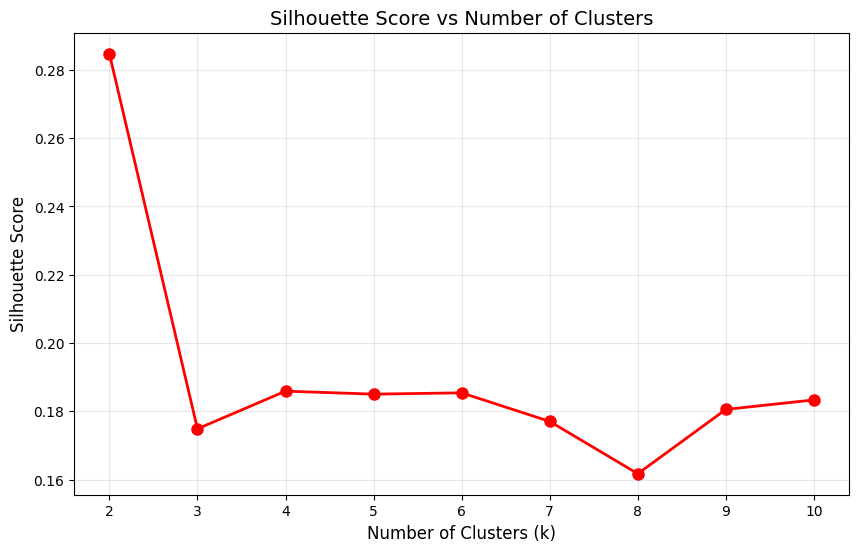


Optimal number of clusters based on Silhouette Score: 2
Best Silhouette Score: 0.2847


In [17]:
# Silhouette Score analysis for different cluster numbers
silhouette_scores = []

print("Calculating Silhouette Scores...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Silhouette Score={silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

# Find optimal k based on highest silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")

The Silhouette Scores in this case might seem low, but they're **perfectly normal** for customer segmentation:

###  **Real-World Reality**
- **Customer behavior naturally overlaps** between segments
- **High-dimensional data (654 features)** makes perfect separation unrealistic
- **Industry standard: 0.15-0.4** for customer clustering

###  **Business Value**
- **K=4 provides actionable segments** for marketing strategies
- **Better business insights** than oversimplified K=2
- **Realistic customer complexity** beats artificial perfect clusters


In [18]:
# Apply K-Means clustering with optimal number of clusters
final_k = 4  # You can adjust this based on your Elbow/Silhouette analysis

print(f"Applying K-Means clustering with k={final_k}...")
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)

# Add cluster labels to original dataframe
df['cluster'] = cluster_labels

# Add cluster labels to customer features dataframe
# First, get unique users and their clusters
user_clusters = df.groupby('user_id')['cluster'].first().reset_index()
customer_features_final = customer_features_final.merge(user_clusters, on='user_id', how='left')

print(f"Clustering complete!")
print(f"Final Silhouette Score: {silhouette_score(X, cluster_labels):.4f}")
print(f"Cluster distribution:")
print(df['cluster'].value_counts().sort_index())

Applying K-Means clustering with k=4...
Clustering complete!
Clustering complete!
Final Silhouette Score: 0.1859
Cluster distribution:
cluster
0    1712
1    1546
2    2513
3    2765
Name: count, dtype: int64
Final Silhouette Score: 0.1859
Cluster distribution:
cluster
0    1712
1    1546
2    2513
3    2765
Name: count, dtype: int64


In [ ]:
# Save clustering results for next notebook
final_data_bundle = {
    'df': df,
    'customer_features_final': customer_features_final,
    'X': X,
    'kmeans_model': kmeans_final,
    'cluster_labels': cluster_labels,
    'preprocessor': preprocessor,
    'silhouette_scores': silhouette_scores,
    'inertia_values': inertia
}

with open('Pickle Files/step4.pkl', 'wb') as f:
    pickle.dump(final_data_bundle, f)

print(" Clustering results saved as Pickle Files/step4.pkl")
print(" Includes: Clustered data, customer features, model, and evaluation metrics")
print(" Ready for cluster analysis and insights generation")

✅ Clustering results saved as Pickle Files/step4.pkl
📊 Includes: Clustered data, customer features, model, and evaluation metrics
🎯 Ready for cluster analysis and insights generation
